# VQC + Fake Dataset
Variational Quantum Classifier (VQC) 
<a href="https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html">The Tutorial of: QML on a Real Dataset </a>

In [1]:
import qiskit
import pandas as pd
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import ZFeatureMap, PauliFeatureMap, ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA, SPSA
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.circuit.library import EfficientSU2
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

from sklearn.metrics import accuracy_score

In [2]:
print("qiskit version is: ", qiskit.__version__)

qiskit version is:  0.45.0


In [5]:
fake_data_df = pd.read_csv("../aif360/Data/fake_data.csv")
fake_data_df.head()

,age,income,gender,car,target
0,45,29923,male,yes,0
1,39,75755,male,yes,0
2,18,73277,male,yes,1
3,37,24442,male,yes,0
4,34,58901,male,yes,0


### Preprocess The Data
- remap the values 

In [15]:
# remap gender to binary
map = {'male': 0, 'female': 1}

# replace values in gender column
fake_data_df['gender'].replace(map, inplace=True)

#remap the car column to binary
map = {'yes': 0, 'no': 1}

# replace values in car column
fake_data_df['car'].replace(map, inplace=True)

In [16]:
# spit the data into y and x 
y = fake_data_df['target']
X = fake_data_df.drop(columns=['target'])

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create FeatureMap 

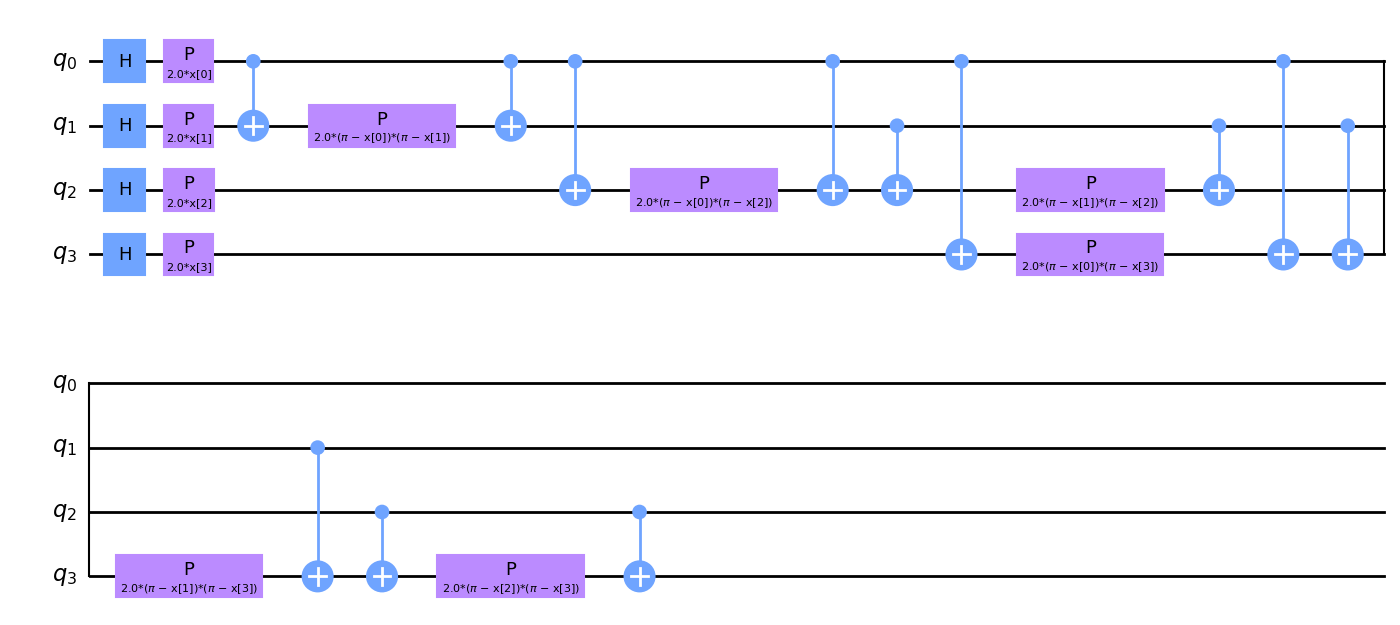

In [17]:
num_features = X_train.shape[1]

zz_feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
zz_feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

#### Create Sampler and Optimizer 

In [18]:
sampler = Sampler()

optimizer_c = COBYLA(maxiter=100) 

In [19]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [20]:
vqc = VQC(
    sampler = sampler,
    feature_map = zz_feature_map,
    ansatz = EfficientSU2(num_qubits=num_features, reps=1),
    optimizer = optimizer_c,
    callback = callback_graph
)

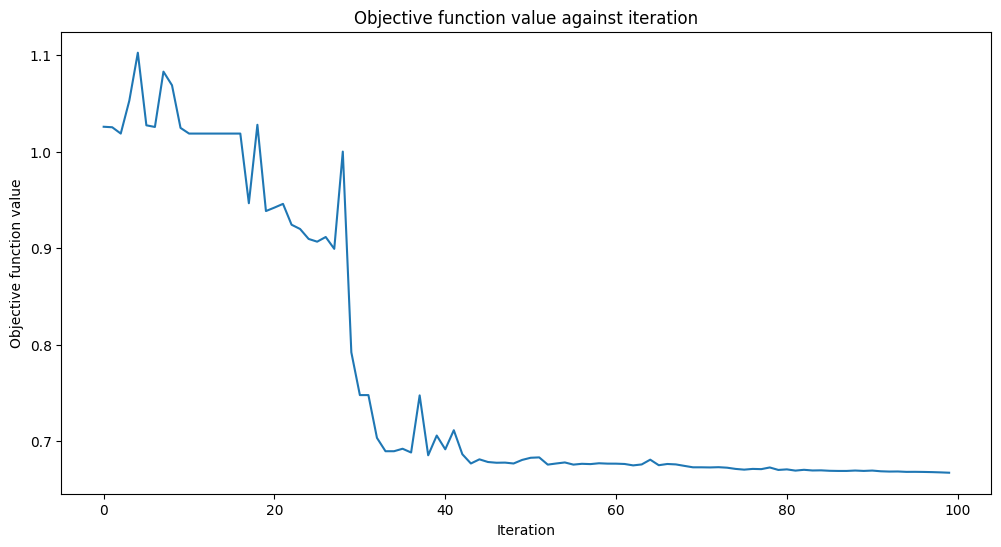

Training time: 1285 seconds


In [21]:
# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train.values.reshape(-1, 1))
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")